In [621]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

In [622]:
IMAGE_SIZE = 9
vert_bar_image = Image.new('L', (IMAGE_SIZE, IMAGE_SIZE))

center_pt = IMAGE_SIZE // 2
coords = [
    (center_pt - 2, 0),
    (center_pt + 2, IMAGE_SIZE - 1)
]
ImageDraw.Draw(vert_bar_image).rectangle(coords, outline=255, fill=255)

horz_bar_image = vert_bar_image.rotate(90)
diag_bar_image = vert_bar_image.rotate(45)
diag_bar_image2 = vert_bar_image.rotate(-30)

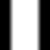

In [623]:
vert_bar_image.resize((50, 50))

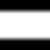

In [624]:
horz_bar_image.resize((50, 50))

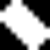

In [625]:
diag_bar_image.resize((50, 50))

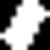

In [626]:
diag_bar_image2.resize((50, 50))

In [627]:
def display_kernel_raw(kernel, precision=1):
    kernel = kernel.reshape(IMAGE_SIZE, IMAGE_SIZE)
    format_string = '{:4.' + str(precision) + 'f}'
    
    for r in kernel:
        s = ''
        for c in r:
            # s += ' ' + f'{c:4.1f}'
            s += ' ' + format_string.format(c)

        print(s)   

In [628]:
SAMPLES_COUNT = 100
data = []

# for i in range(SAMPLES_COUNT // 2):
#     data.append(np.array(vert_bar_image).ravel())
#     # data.append(np.array(vert_bar_image).ravel())
#     data.append(np.array(horz_bar_image).ravel())
#     data.append(np.array(horz_bar_image).ravel())

# data.append(np.array(vert_bar_image).ravel())

images = [vert_bar_image, horz_bar_image, diag_bar_image, diag_bar_image2]
images =list(map(lambda x: np.array(x).ravel(), images))
random_indices = np.random.randint(len(images), size=SAMPLES_COUNT)

for i in random_indices:
    data.append(images[i])

data = np.array(data)

In [629]:
data.shape, np.unique(data)

((100, 81), array([  0, 255], dtype=uint8))

In [630]:
scaled_data = preprocessing.scale(data)

In [631]:
display_kernel_raw(preprocessing.scale(data)[0])

  0.0  0.0  1.1  1.1  1.1  1.1  1.1  0.0  0.0
  0.0 -0.7  1.1  0.6  0.6  1.1  1.1 -0.6  0.0
 -1.1 -1.1  0.6  0.0  0.0  0.0  0.7 -1.1 -1.1
 -1.1 -1.1  0.0  0.0  0.0  0.0  0.0 -1.1 -0.6
 -0.6 -1.1  0.0  0.0  0.0  0.0  0.0 -1.1 -0.6
 -0.6 -1.1  0.0  0.0  0.0  0.0  0.0 -1.1 -1.1
 -1.1 -1.1  0.7  0.0  0.0  0.0  0.6 -1.1 -1.1
  0.0 -0.6  1.1  1.1  0.6  0.6  1.1 -0.7  0.0
  0.0  0.0  1.1  1.1  1.1  1.1  1.1  0.0  0.0


In [632]:
display_kernel_raw(preprocessing.scale(data, axis=1)[0])

 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1
 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1
 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1
 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1
 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1
 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1
 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1
 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1
 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1


In [633]:
display_kernel_raw(preprocessing.scale(data.T).T[0])

 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1
 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1
 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1
 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1
 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1
 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1
 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1
 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1
 -1.1 -1.1  0.9  0.9  0.9  0.9  0.9 -1.1 -1.1


In [634]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

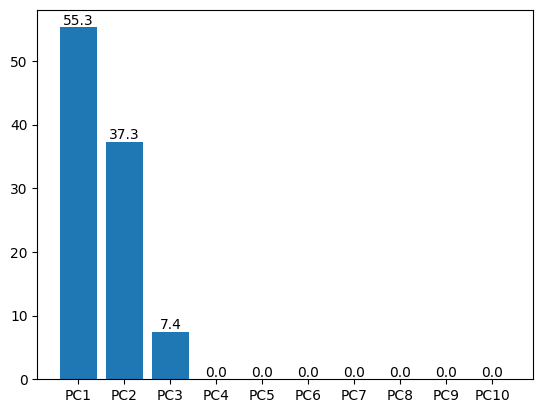

In [635]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)[:10]
per_var_names = [f'PC{i+1}' for i in range(len(per_var))]

p = plt.bar(per_var_names, per_var)
plt.bar_label(p, map(str, per_var))
plt.show()

  0.0  0.0  0.0  0.0 255.0 255.0 255.0  0.0  0.0
  0.0  0.0  0.0 255.0 255.0 255.0 255.0  0.0  0.0
  0.0  0.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0
  0.0  0.0 255.0 255.0 255.0 255.0 255.0 255.0  0.0
  0.0  0.0 255.0 255.0 255.0 255.0 255.0  0.0  0.0
  0.0 255.0 255.0 255.0 255.0 255.0 255.0  0.0  0.0
 255.0 255.0 255.0 255.0 255.0 255.0 255.0  0.0  0.0
  0.0  0.0 255.0 255.0 255.0 255.0  0.0  0.0  0.0
  0.0  0.0 255.0 255.0 255.0  0.0  0.0  0.0  0.0


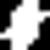

In [636]:
pc = pca.components_[0].copy()
pc *= data.std(axis=0)
pc += data.mean(axis=0)
pc[pc < 127] = 0
pc[pc > 0] = 255
display_kernel_raw(pc, 1)
Image.frombytes('L', size=(IMAGE_SIZE, IMAGE_SIZE), data=pc.astype(np.uint8)).resize((50, 50))

  0.0  0.0 255.0 255.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0 255.0 255.0 255.0  0.0  0.0  0.0  0.0
 255.0 255.0 255.0 255.0 255.0 255.0 255.0  0.0  0.0
 255.0 255.0 255.0 255.0 255.0 255.0 255.0  0.0  0.0
  0.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0  0.0
  0.0  0.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0
  0.0  0.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0
  0.0  0.0  0.0  0.0 255.0 255.0 255.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0 255.0 255.0  0.0  0.0


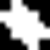

In [637]:
pc = pca.components_[1].copy()
pc *= data.std(axis=0)
pc += data.mean(axis=0)
pc[pc < 127] = 0
pc[pc > 0] = 255
display_kernel_raw(pc, 1)
Image.frombytes('L', size=(IMAGE_SIZE, IMAGE_SIZE), data=pc.astype(np.uint8)).resize((50, 50))

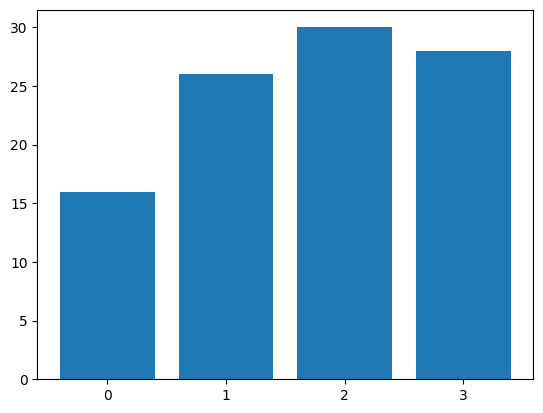

In [638]:
z = np.unique_counts(random_indices)
plt.bar(list(map(str, z.values)), z.counts)
plt.show()